In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

Downloading the data

In [2]:
tf.keras.datasets.mnist.load_data(path="V:\github\mnist-cnn\data\mnist.npz");

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

<h2>Displaying the data</h2>

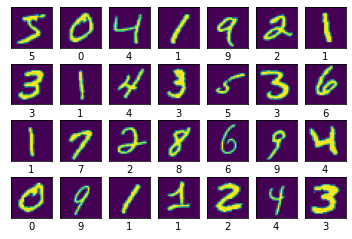

In [4]:
for i in range(28):
    plt.subplot(4,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

<h2>Trying out a simple model</h2>

Converting the labels to categories, needded for the accuracy measure

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
X_train = X_train.astype("float32") /255
X_test = X_test.astype("float32") /255

In [7]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [8]:
y_train.shape

(60000, 10)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=0)


In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07463261485099792
Test accuracy: 0.9810000061988831


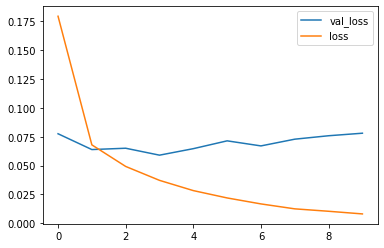

In [11]:
plt.plot(history.history["val_loss"], label ="val_loss")
plt.plot(history.history["loss"], label="loss")
plt.legend()

The very simple model performs great, but it suffers from significant overfitting.

<h2>Lets try different fitler sizes</h2>

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(28, 28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.0550849623978138
Test accuracy: 0.9861000180244446


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2,2), activation='relu', input_shape=(28, 28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09424494951963425
Test accuracy: 0.977400004863739


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (9,9), activation='relu', input_shape=(28, 28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05566306784749031
Test accuracy: 0.9855999946594238


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(28, 28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06450183689594269
Test accuracy: 0.9872000217437744


Test loss: 0.05002271384000778
Test accuracy: 0.9883000254631042


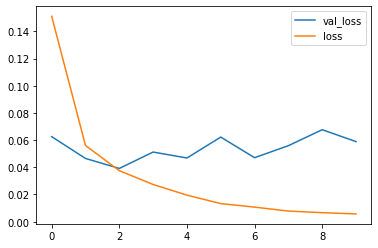

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(28, 28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
plt.plot(history.history["val_loss"], label ="val_loss")
plt.plot(history.history["loss"], label="loss")
plt.legend()

Test loss: 0.03840383142232895
Test accuracy: 0.9894000291824341


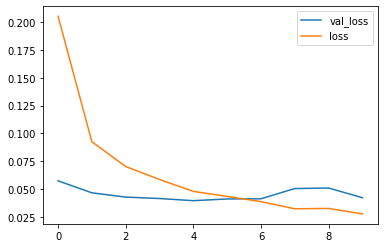

In [21]:
#adding a dropout layer to target the overfitting
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(28, 28,1)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(20))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
plt.plot(history.history["val_loss"], label ="val_loss")
plt.plot(history.history["loss"], label="loss")
plt.legend()

Test loss: 0.057713866233825684
Test accuracy: 0.983299970626831


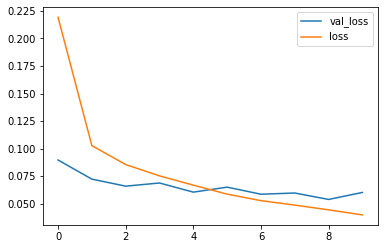

In [23]:
#adding a dropout layer to target the overfitting
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.6))
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
plt.plot(history.history["val_loss"], label ="val_loss")
plt.plot(history.history["loss"], label="loss")
plt.legend()

Test loss: 0.06883157789707184
Test accuracy: 0.9785000085830688


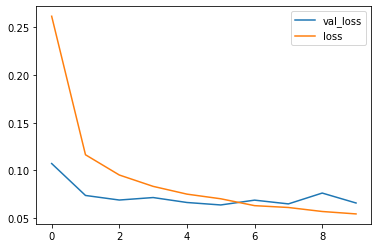

In [26]:
#adding a dropout layer to target the overfitting
model = models.Sequential()
model.add(layers.Conv2D(8, (3,3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
plt.plot(history.history["val_loss"], label ="val_loss")
plt.plot(history.history["loss"], label="loss")
plt.legend()

Test loss: 0.12086697667837143
Test accuracy: 0.9650999903678894


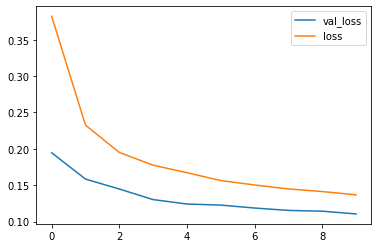

In [27]:
#adding a dropout layer to target the overfitting
model = models.Sequential()
model.add(layers.Conv2D(4, (2,2), activation='relu', input_shape=(28, 28,1)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
plt.plot(history.history["val_loss"], label ="val_loss")
plt.plot(history.history["loss"], label="loss")
plt.legend()